![Image From RiverKeepers](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuHi8PnS-Uf8FF2I7OmHI3LFpXV1ZcVYEa_pE76hpB69FsDC86xA)

                                                   Image From RiverKeepers

Name: MUSA T GANIYU

Course: DATA 608

Assignment Week: Week 4

# Modules:
Below are the modules we will be using for this analysis. Kindly install them first(If you dont have it already). You may use, for example, "! pip install seaborn" to install it using Jupyter notebook or better still install usimg your cmd without the "!".

In [1]:

from pandas import DataFrame, Series, to_datetime, read_csv
#from bokeh.charts import TimeSeries, show, output_file
import plotly.plotly as py
import plotly.graph_objs as go
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
import ipywidgets as widgets
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
df = read_csv("https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv")
df.head() #The dataset glipmse

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


In [3]:
df.describe()

,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000
mean,0.568001,56.886370
std,1.000387,41.588476
min,0.000000,27.000000
25%,0.000000,37.000000
50%,0.200000,42.000000
75%,0.700000,50.000000
max,8.500000,187.000000


As we can see, someof the variable needs to cleaned. First, we are going to convert the "Date" variable to "datetime64[ns]" from "pandas.core.series.Series" for a better analysis.

In [4]:

type(df.Date)

pandas.core.series.Series

In [5]:
df["Date"] = pd.to_datetime(df.Date)
df.head() # After cleaning

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35
1,Hudson above Mohawk River,2013-10-21,4,0.2,35
2,Hudson above Mohawk River,2013-09-21,20,0.0,35
3,Hudson above Mohawk River,2013-08-19,6,0.0,35
4,Hudson above Mohawk River,2013-07-21,31,0.0,35


In [6]:
df.Date.head() 

0   2011-10-16
1   2013-10-21
2   2013-09-21
3   2013-08-19
4   2013-07-21
Name: Date, dtype: datetime64[ns]

Also, the EnteroCount variable has some unwanted string in it, we will therefore remove them and convert it to numeric.

In [7]:
df['EnteroCount'] = df['EnteroCount'].map(lambda x: x.lstrip('< >'))
df.iloc[12:40]


,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
12,Hudson above Mohawk River,2013-06-24,30,1.4,35
13,Hudson above Mohawk River,2011-09-19,11,0.1,35
14,Hudson above Mohawk River,2011-08-21,231,0.4,35
15,Hudson above Mohawk River,2011-07-14,11,0.3,35
16,Hudson above Mohawk River,2011-07-02,11,2.1,35
17,Hudson above Mohawk River,2011-05-19,91,1.6,35
18,Hudson above Mohawk River,2010-10-16,2420,1.3,35
19,Hudson above Mohawk River,2010-09-14,15,0.0,35
20,Hudson above Mohawk River,2010-08-21,25,0.2,35
21,Hudson above Mohawk River,2010-07-19,31,0.7,35


In [8]:
# Let convert the "EnteroCount to Numeric

df['EnteroCount'] = pd.to_numeric(df.EnteroCount, errors='coerce')

# Question 1:

We are required to show and plot the federal standard unacceptable Enterococcus Count that are greater than the accepatable count of 110.


In [9]:
Worst = (df.groupby(['Site', 'Date']).sum().loc[lambda df: df.EnteroCount >= 110])
Best = (df.groupby(['Site', 'Date']).sum().loc[lambda df: df.EnteroCount <= 110])
print(Worst)


                                   EnteroCount  FourDayRainTotal  SampleCount
Site                   Date                                                  
125th St. Pier         2006-10-02         1433               0.5           66
                       2006-10-03          773               0.4           66
                       2006-10-06          824               0.7           66
                       2006-10-11          269               0.4           66
                       2006-10-12          305               1.9           66
                       2006-10-31          147               2.2           66
                       2007-06-04         1500               3.9           66
                       2007-06-05          200               3.9           66
                       2007-06-09          121               0.0           66
                       2007-06-12         1500               0.0           66
                       2007-06-28          340               0.7

We are going to "de-index" the two dataset (From wide to long format)

In [10]:
Worst.reset_index(level=0, inplace=True)
Worst.reset_index(level=0, inplace=True)
Best.reset_index(level=0, inplace=True)
Best.reset_index(level=0, inplace=True)

In [11]:
Best.head()

,Date,Site,EnteroCount,FourDayRainTotal,SampleCount
0,2007-05-29,125th St. Pier,83,0.0,66
1,2007-05-30,125th St. Pier,21,0.0,66
2,2007-05-31,125th St. Pier,8,0.0,66
3,2007-06-01,125th St. Pier,12,0.0,66
4,2007-06-02,125th St. Pier,18,0.0,66


The two plots below uses the seaborn plotting approach for just the worst place to swim. We shall later look into a better approach, Plotly!

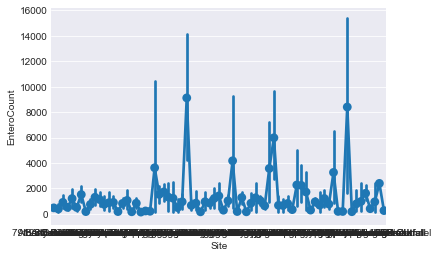

In [171]:

sns.pointplot(x="Site",y="EnteroCount",data=Worst)
plt.figure(figsize=(30, 25), dpi= 80, facecolor='w', edgecolor='k')


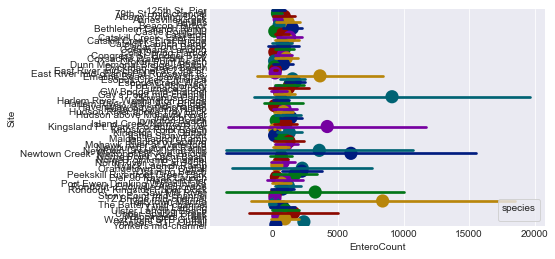

In [170]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.set_style("darkgrid")

sns.pointplot(x="EnteroCount", y="Site",
              data=Worst, dodge=.532, join=True, palette="dark",
              scale=1.5, ci="sd", orient="h",
              markers=["o", "x"],linestyles=["-", "--"],size=8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=5,
          loc="lower right", ncol=3, frameon=True)

# PLOTLY APPROACH

Below, we are going to explore the PLOTLY Module. 

Lets try to plot the Worst and Best EnteroCount against Site in one graph!

In [167]:

import plotly.plotly as py
import plotly.graph_objs as go
#py.tools.set_credentials_file(username='mascotime', api_key='dcanSGjfWhF07dF7Fuz9')
trace1 = go.Scatter(
    y=Worst['EnteroCount'],
    x=Worst['Site'],
    mode = 'markers+lines',
    name='Worst Place To Swim'
)

trace2 = go.Scatter(
      y=Best['EnteroCount'],
      x=Best['Site'],
      mode = 'markers',
      name='Best Place To Swim'
)


layout= go.Layout(
    title= 'Graph Showing The Best and Worst Place To Swim')

data =[trace1, trace2]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

A better approach is to embed all the three variable (Site, Date, FourDayRainTotal) together against the EnteroCount in one plot. This would make it easier to compare and constrast.


l= []
y= []

#Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((2000+i))
    trace0= go.Scatter(
        x = Worst['EnteroCount'],
        y = Worst['Site'],
        mode= 'markers',
        marker= dict(size= 14,
                    line= dict(width=1),
                    color= c[i],
                    opacity= 0.3
                   ),name= y[i],
        text= Worst['Date']) 
    l.append(trace0);

layout= go.Layout(
    title= 'Graph showing the unacceptable Entero Count against Site and Date ',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Entero Count',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Site',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

# Question 2: 

We are required to obtain the list as well as a plot of the most visited and less visited site.

I will subset the dataframe, change the column name and convert to numeric

In [123]:
sum_test_site = (df.groupby('Site')
.agg({'SampleCount':'count', 'FourDayRainTotal': 'sum'})
.reset_index()
.rename(columns={'SampleCount':'Sample_Count'})
)

sum_test_site['Sample_Count'] = pd.to_numeric(sum_test_site.Sample_Count, errors='coerce')
print(sum_test_site)

                                       Site  Sample_Count  FourDayRainTotal
0                            125th St. Pier            66              50.9
1                      79th St. mid-channel            49              42.2
2                        Albany Rowing Dock            36              22.7
3                          Annesville Creek            38              18.4
4                                    Athens            35              20.9
5                             Beacon Harbor            38              14.0
6                     Bethlehem Launch Ramp            36              20.5
7                          Castle Point, NJ            39              25.9
8                                 Castleton            35              20.6
9                  Catskill Creek- East End            42              24.3
10             Catskill Creek- First Bridge            38              22.8
11                     Catskill Launch Ramp            37              22.4
12          

In [125]:
freq_test_site = sum_test_site.sort_values("Sample_Count", ascending=0) # Here is the count of site visited.
freq_test_site.head(10)

,Site,Sample_Count,FourDayRainTotal
57,Piermont Pier,187,99.8
70,Upper Sparkill Creek,165,86.8
0,125th St. Pier,66,50.9
52,Nyack Launch Ramp,61,30.9
47,Newtown Creek- Dutch Kills,57,48.6
65,TZ Bridge mid-channel,57,40.0
53,Orangetown STP Outfall,57,35.1
48,Newtown Creek- Metropolitan Ave. Bridge,57,48.6
74,Yonkers mid-channel,52,38.3
73,Yonkers STP Outfall,51,37.6


In [135]:
top10 = freq_test_site.iloc[0:10] #Top 10 most visited sites
top10

,Site,Sample_Count,FourDayRainTotal
57,Piermont Pier,187,99.8
70,Upper Sparkill Creek,165,86.8
0,125th St. Pier,66,50.9
52,Nyack Launch Ramp,61,30.9
47,Newtown Creek- Dutch Kills,57,48.6
65,TZ Bridge mid-channel,57,40.0
53,Orangetown STP Outfall,57,35.1
48,Newtown Creek- Metropolitan Ave. Bridge,57,48.6
74,Yonkers mid-channel,52,38.3
73,Yonkers STP Outfall,51,37.6


In [134]:
less_test_site = sum_test_site.sort_values("Sample_Count", ascending=1) #Top 10 Less visted sites
less_test_site.head(10);

l_top10 = less_test_site.iloc[0:10]
l_top10

,Site,Sample_Count,FourDayRainTotal
66,Tarrytown Marina,27,22.0
14,Cold Spring Harbor,35,10.7
35,Hudson above Mohawk River,35,22.1
38,Island Creek/Normans Kill,35,22.5
44,Marlboro Landing,35,10.2
16,Coxsackie Waterfront Park,35,21.2
45,Mohawk River at Waterford,35,22.1
8,Castleton,35,20.6
71,Wappingers Creek,35,10.2
4,Athens,35,20.9


An interactive plot showing the most and less visited in one plot.

In [165]:
from plotly import tools

trace1 = go.Scatter(
      y=top10['Sample_Count'],
      x=top10['Site']
)
trace2 = go.Scatter(
      y=l_top10['Sample_Count'],
      x=l_top10['Site']
)


fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Most Sampled', 'Less Sampled'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
                                                  ' with Titles')
fig['layout'].update(showlegend=False, title='Plot Showing Both Top And Less Site Sampled')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



# Question 3:

We are asked to find the relationship between EnteroCount and FourDayRainTotal, also show it graphically.

In [174]:
# Obtaining the correlation co-efficient 
print(np.corrcoef(df.EnteroCount,df.FourDayRainTotal))

[[ 1.          0.14482599]
 [ 0.14482599  1.        ]]


From the above, we can deduce that there is weak positive correlation between the rains and entero count.

In [217]:

Entero_Count = df["EnteroCount"]
Four_Day = df["FourDayRainTotal"]
Date = df["Date"]

trace = go.Scatter3d(
    x=Entero_Count,
    y=Four_Day,
    z=Date,
    mode='markers',
    marker=dict(
        size=12,
        color=y,                
        colorscale='Viridis',   
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        r=0,
        b=0,
        l=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


# THANKS